In [3]:
# read in the data from the csv file
import pandas as pd
import numpy as np
# read in the data from the csv file
data=pd.read_csv("/srv/network_analysis_outputs/SYNGAP1_T1_fanling/ActivityScan_outputs/Compiled_ActivityScan.csv")

In [42]:
# Screening criteria
# criteria 1: screen CHIP_ID with Active_area consistently smaller than 35 across all 'DIV'
grouped_data = data.groupby(['Chip_ID', 'Well'])

# Filter out groups where all Active_area values are less than 35
data_screen = grouped_data.filter(lambda x: all(x['Active_area'] < 35))

# Display the filtered data
data_screen_unique_units = data_screen.drop_duplicates(subset=['Chip_ID', 'Well'])
data_screen_unique_units

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,Mean_FiringRate,Mean_SpikeAmplitude,Active_area
11,7,4,6,HET,25-Mar-2024 13:49:55,M07036,1.67575,41.449051,7.909091


In [4]:
# criteria 2: Filter out groups where any Active_area values are less than 35 after DIV 4 and DIV 7

# subset drop div 4 and div 7
data_subset = data[data['DIV'] > 7]
grouped_data = data_subset.groupby(['Chip_ID', 'Well'])

# Erase groups where any Active_area values are less than 35 after DIV 4 and DIV 7
data_screen = grouped_data.filter(
    lambda x: (x['Active_area'].any() <= 35)
)

# Display the filtered data with unique combinations of Chip_ID and Well
data_screen_unique_units = data_screen.drop_duplicates(subset=['Chip_ID', 'Well'])
data_screen_unique_units

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,Mean_FiringRate,Mean_SpikeAmplitude,Active_area
48,17,12,1,WT,02-Apr-2024 09:35:20,M06691,1.254047,87.557557,66.075758
49,17,12,2,WT,02-Apr-2024 09:35:20,M06691,0.700967,86.552270,51.318182
50,17,12,3,WT,02-Apr-2024 09:35:20,M06691,1.081837,84.852629,69.681818
51,17,12,4,WT,02-Apr-2024 09:35:20,M06691,0.798782,81.623645,46.454545
52,17,12,5,WT,02-Apr-2024 09:35:20,M06691,0.725715,82.198943,51.181818
53,17,12,6,WT,02-Apr-2024 09:35:20,M06691,0.873948,82.458654,58.212121
54,23,12,1,HET,02-Apr-2024 11:02:13,M07036,0.786003,86.491723,51.500000
55,23,12,2,HET,02-Apr-2024 11:02:13,M07036,0.867725,83.076506,50.833333
56,23,12,3,HET,02-Apr-2024 11:02:13,M07036,1.295679,71.125329,48.424242
57,23,12,4,HET,02-Apr-2024 11:02:13,M07036,0.784861,85.854243,54.227273


<Figure size 1400x1000 with 0 Axes>

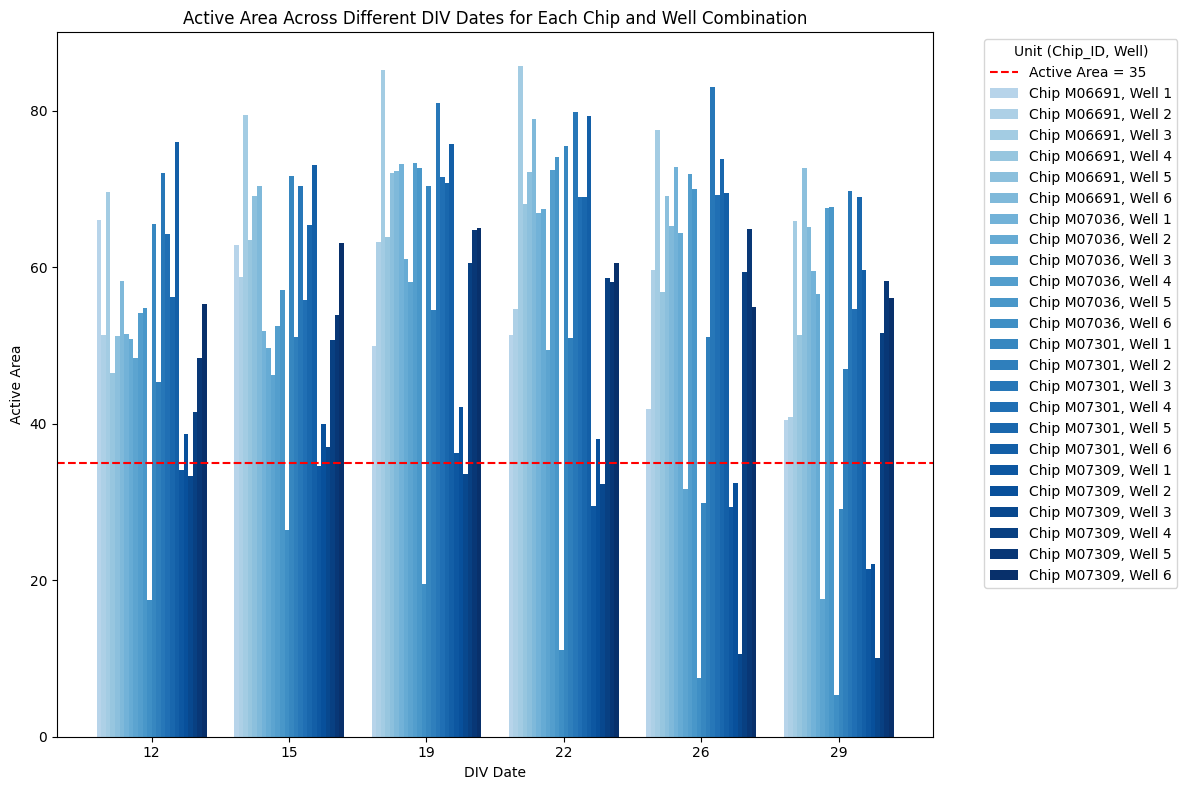

In [6]:
import numpy as np
import matplotlib.pyplot as plt

pivot_data = data_screen.pivot_table(index=['DIV'], columns=['Chip_ID', 'Well'], values='Active_area', aggfunc='mean')
num_units = len(pivot_data.columns)
# Generating different shades of blue for each unit
colors = plt.cm.Blues(np.linspace(0.3, 1, num_units))

# Adjusting the plot to make the bars from different units at the same DIV distribute side by side in a vertical orientation
plt.figure(figsize=(14, 10))

# Re-calculating the pivot data since it seems not in scope here


# Define the number of units and calculate the width of each bar based on the number of units
num_units = len(pivot_data.columns)
total_width = 0.8  # Total space allocated for all bars at each DIV date
bar_width = total_width / num_units  # Width of each individual bar

# Plot setup
plt.figure(figsize=(12, 8))

# Plotting
for index, (column, series) in enumerate(pivot_data.items()):
    # Position each bar based on its order in the dataframe
    positions = [x - (total_width - bar_width) / 2 + index * bar_width for x in range(len(pivot_data))]
    plt.bar(positions, series.values, width=bar_width, color=colors[index], label=f'Chip {column[0]}, Well {column[1]}')

# Adding a horizontal dashed line at Active Area = 35 for reference
plt.axhline(y=35, color='r', linestyle='--', linewidth=1.5, label='Active Area = 35')

# Labeling and aesthetics
plt.xlabel('DIV Date')
plt.ylabel('Active Area')
plt.title('Active Area Across Different DIV Dates for Each Chip and Well Combination')
plt.xticks(range(len(pivot_data)), pivot_data.index)  # Set x-ticks to be the DIV dates
plt.legend(title="Unit (Chip_ID, Well)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

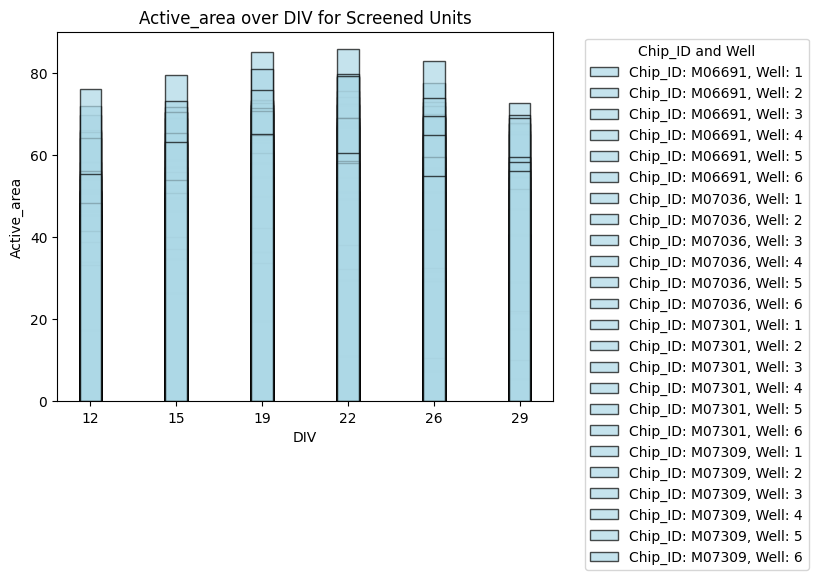

In [7]:
# check the data

# Get unique DIV values and normalize them to be evenly spaced
div_values = sorted(data_screen['DIV'].unique())
normalized_div = np.linspace(0, 1, len(div_values))

# Create a mapping from actual DIV values to normalized values
div_mapping = {div: norm_div for div, norm_div in zip(div_values, normalized_div)}

# Plotting the screened units using a bar plot
fig, ax = plt.subplots()

for (chip_id, well), group in data_screen.groupby(['Chip_ID', 'Well']):
    # Map the DIV values to the normalized scale
    normalized_group_div = group['DIV'].map(div_mapping)
    ax.bar(normalized_group_div, group['Active_area'], 
           label=f'Chip_ID: {chip_id}, Well: {well}', 
           color='lightblue', 
           width=0.05,  # Adjust width for normalized scale
           alpha=0.7, 
           edgecolor='black')  # Add black edge to the bars

# Set x-axis ticks to the normalized values and label them with the original DIV values
ax.set_xticks(normalized_div)
ax.set_xticklabels(div_values)

ax.set_xlabel('DIV')
ax.set_ylabel('Active_area')
ax.set_title('Active_area over DIV for Screened Units')
ax.legend(title='Chip_ID and Well', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(False)  # Eliminate the grid

plt.show()